# 6.4 Supervised Machine Learning - Regression

### 1. Importing librares and data
### 2. Data cleaning
### 3. Data prep for regression analysis
### 4. Regression analysis

### 1. Importing libraries and data

In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [93]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [94]:
# Set path

path = r'/Users/shaheirjibin/Documents/Data Analytics/02 Data Analytics Immersion/06 Advanced Analytics & Dashboard Design/Petrol stations in Germany'

In [95]:
# Import petrol stations in Germany dataset

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'petrol_state.csv'))

In [96]:
df.head()

,Unnamed: 0,uuid,name,brand,street,house_number,post_code,city,latitude,longitude,first_active,openingtimes_json,year,month,diesel,e5,e10,state
0,0,0e18d0d3-ed38-4e7f-a18e-507a78ad901d,OIL! Tankstelle München,OIL!,Eversbuschstraße 33,NaN,80999,München,48.1807,11.46090,1970-01-01 01:00:00+01,"{""openingTimes"":[{""applicable_days"":192,""perio...",2023,1,1.814,1.766,1.706,Bayern
1,1,0e18d0d3-ed38-4e7f-a18e-507a78ad901d,OIL! Tankstelle München,OIL!,Eversbuschstraße 33,NaN,80999,München,48.1807,11.46090,1970-01-01 01:00:00+01,"{""openingTimes"":[{""applicable_days"":192,""perio...",2023,2,1.752,1.787,1.727,Bayern
2,2,0e18d0d3-ed38-4e7f-a18e-507a78ad901d,OIL! Tankstelle München,OIL!,Eversbuschstraße 33,NaN,80999,München,48.1807,11.46090,1970-01-01 01:00:00+01,"{""openingTimes"":[{""applicable_days"":192,""perio...",2023,3,1.723,1.813,1.753,Bayern
3,3,0e18d0d3-ed38-4e7f-a18e-507a78ad901d,OIL! Tankstelle München,OIL!,Eversbuschstraße 33,NaN,80999,München,48.1807,11.46090,1970-01-01 01:00:00+01,"{""openingTimes"":[{""applicable_days"":192,""perio...",2023,4,1.703,1.840,1.780,Bayern
4,4,ad812258-94e7-473d-aa80-d392f7532218,bft Bonn-Bad Godesberg,bft,Godesberger Allee,55,53175,Bonn,50.6951,7.14276,1970-01-01 01:00:00+01,"{""openingTimes"":[{""applicable_days"":31,""period...",2023,1,1.801,1.781,1.721,Nordrhein-Westfalen


### 2. Data cleaning

In [97]:
# Drop column 'Unnamed: 0'

df.drop('Unnamed: 0', axis=1, inplace=True)

In [98]:
df.head()

,uuid,name,brand,street,house_number,post_code,city,latitude,longitude,first_active,openingtimes_json,year,month,diesel,e5,e10,state
0,0e18d0d3-ed38-4e7f-a18e-507a78ad901d,OIL! Tankstelle München,OIL!,Eversbuschstraße 33,NaN,80999,München,48.1807,11.46090,1970-01-01 01:00:00+01,"{""openingTimes"":[{""applicable_days"":192,""perio...",2023,1,1.814,1.766,1.706,Bayern
1,0e18d0d3-ed38-4e7f-a18e-507a78ad901d,OIL! Tankstelle München,OIL!,Eversbuschstraße 33,NaN,80999,München,48.1807,11.46090,1970-01-01 01:00:00+01,"{""openingTimes"":[{""applicable_days"":192,""perio...",2023,2,1.752,1.787,1.727,Bayern
2,0e18d0d3-ed38-4e7f-a18e-507a78ad901d,OIL! Tankstelle München,OIL!,Eversbuschstraße 33,NaN,80999,München,48.1807,11.46090,1970-01-01 01:00:00+01,"{""openingTimes"":[{""applicable_days"":192,""perio...",2023,3,1.723,1.813,1.753,Bayern
3,0e18d0d3-ed38-4e7f-a18e-507a78ad901d,OIL! Tankstelle München,OIL!,Eversbuschstraße 33,NaN,80999,München,48.1807,11.46090,1970-01-01 01:00:00+01,"{""openingTimes"":[{""applicable_days"":192,""perio...",2023,4,1.703,1.840,1.780,Bayern
4,ad812258-94e7-473d-aa80-d392f7532218,bft Bonn-Bad Godesberg,bft,Godesberger Allee,55,53175,Bonn,50.6951,7.14276,1970-01-01 01:00:00+01,"{""openingTimes"":[{""applicable_days"":31,""period...",2023,1,1.801,1.781,1.721,Nordrhein-Westfalen


In [99]:
# Check for missing values

df.isnull().sum()

uuid                    0
name                    7
brand                2169
street                  3
house_number         2475
post_code               0
city                   12
latitude                0
longitude               0
first_active            0
openingtimes_json       0
year                    0
month                   0
diesel                  0
e5                      0
e10                     0
state                   0
dtype: int64

In [100]:
dups = df.duplicated()

In [101]:
dups.shape

(55804,)

In [102]:
# Remove rows with missing values in the column 'brand' since this is not crucial for this analysis

df_cleaned = df.dropna(subset=['brand'])

In [103]:
df_cleaned.isnull().sum()

uuid                    0
name                    7
brand                   0
street                  3
house_number         2440
post_code               0
city                   12
latitude                0
longitude               0
first_active            0
openingtimes_json       0
year                    0
month                   0
diesel                  0
e5                      0
e10                     0
state                   0
dtype: int64

In [104]:
df = df_cleaned

/var/folders/l1/ggt7tv8n4bd823d059sz60v00000gn/T/ipykernel_3251/3600615573.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['diesel'], bins=25)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='diesel', ylabel='Density'>

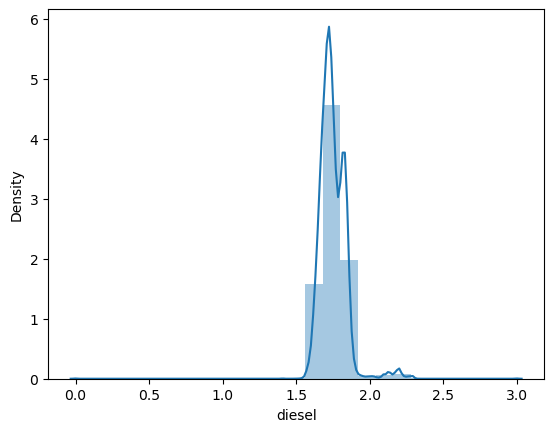

In [105]:
# Check for extreme values

sns.distplot(df['diesel'], bins=25)

In [106]:
df['diesel'].mean()

1.7501610329076163

In [107]:
df['diesel'].median()

1.736

In [108]:
df['diesel'].max()

3.0

In [109]:
# Create a subset from the columns 'e10', 'diesel' and 'state'

df_lin = df[['e10', 'diesel', 'state']]

In [110]:
df_lin = df_lin.query('e10 != 0 and diesel != 0')

In [111]:
# Remove any low and high outliers

df_lin = df_lin.query('e10 >= 1.5 and diesel >= 1.4')
df_lin = df_lin.query('e10 < 2.6 and diesel < 2.6')

### 3. Data prep for regression analysis

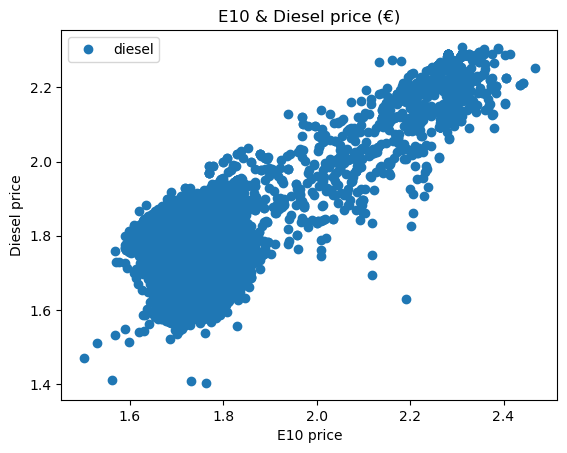

In [129]:
df_lin.plot(x = 'e10', y='diesel',style='o')
plt.title('E10 & Diesel price (€)')  
plt.xlabel('E10 price')  
plt.ylabel('Diesel price')  
plt.show()

In [113]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_lin['e10'].values.reshape(-1,1)
y = df_lin['diesel'].values.reshape(-1,1)

In [114]:
X

array([[1.706],
       [1.727],
       [1.753],
       ...,
       [2.255],
       [1.889],
       [1.941]])

In [115]:
y

array([[1.814],
       [1.752],
       [1.723],
       ...,
       [2.137],
       [1.769],
       [1.845]])

In [116]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

In [117]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [118]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [119]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

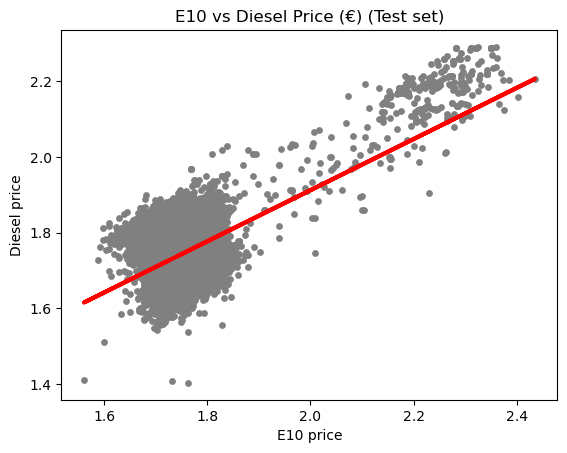

In [130]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('E10 vs Diesel Price (€) (Test set)')
plot_test.xlabel('E10 price')
plot_test.ylabel('Diesel price')
plot_test.show()

The line appears to fit the data well. There's a clear upward trend in diesel price as E10 price increases. However, there are some data points scattered below the line, indicating that the price of diesel isn't perfectly predictable by E10 price alone.

In [121]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [122]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.67627504]]
Mean squared error:  0.005528496970678603
R2 score:  0.3631839553209162


Th positive slope indicates a positive correlation between E10 and diesel price, which is consistent with the visual trend.

Low mean squared error suggests that the model makes decent predictions on average.

The R2 score is only 0.36, which means the model explains only about 36% of the variance in diesel price. There are likely other factors influencing diesel price besides E10.

In [123]:
y_predicted

array([[1.73921395],
       [1.75476827],
       [1.75612082],
       ...,
       [1.70945785],
       [1.7567971 ],
       [1.72501217]])

In [124]:
# Create a dataframe comparing the actual and predicted values of y.

df_predicted = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
df_predicted.head(30)

,Actual,Predicted
0,1.777,1.739214
1,1.708,1.754768
2,1.812,1.756121
3,1.594,1.725688
4,1.614,1.743272
5,1.876,1.760855
6,1.728,1.719602
7,1.832,1.705400
8,1.827,1.699314
9,1.846,1.725688


##### Compare how the regression fits the training set

In [125]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [126]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [127]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.67627504]]
Mean squared error:  0.00550092463273779
R2 score:  0.34483099482483703


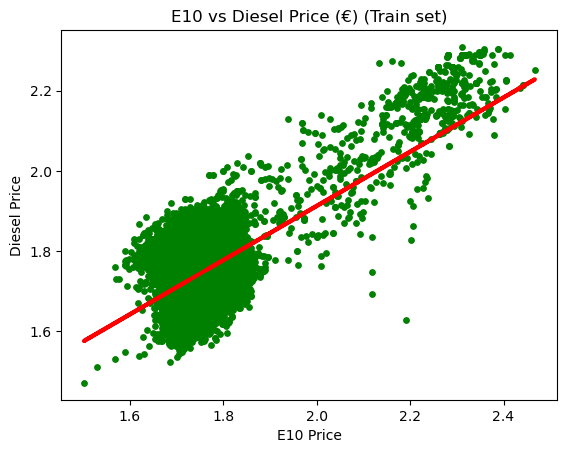

In [131]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('E10 vs Diesel Price (€) (Train set)')
plot_test.xlabel('E10 Price')
plot_test.ylabel('Diesel Price')
plot_test.show()

Positive slope with the value 0.676 is consistent with a positive correlation between E10 and diesel price.

Low mean squared error at 0.0055, indicates the model makes decent predictions on average.

The R2 score remains around 0.34, implying the model explains only about 34% of the variance in diesel price.

There's a slight decrease in R2 score compared to the previous result (0.36), suggesting a minimal decline in explanatory power. However, it's still a relatively low value.

In terms of possible data bias, if the dataset primarily consists of high E10 prices alongside high diesel prices, the model might overestimate the impact of E10 on diesel price.

The model captures a positive trend but has limitations. It might be beneficial to explore including more features or considering non-linear relationships to improve the model's ability to explain diesel price variations.